# UkázkaPD
Zdroj dat: https://www.kaggle.com/datasets/ryanjt/berlin-public-toilets-location/data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv("data/berliner-toiletten-standorte.csv")

4. Zjistěte základní statistické informace o datech.

In [4]:
df.describe(include="all")

,LavatoryID,Description,City,Street,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
count,440,440,440,440,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,349.000000
unique,440,420,1,429,184,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Wall_101003,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,14053,Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,6,440,6,12,440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,13.382906,52.502052,0.811364,0.731818,0.326818,0.640909,0.631818,0.631818,0.238636,2.588636,0.245455,374.326648
std,NaN,NaN,NaN,NaN,NaN,NaN,0.112861,0.048741,0.391665,0.443517,0.237698,0.480280,0.482860,0.482860,0.426735,2.148551,0.430846,333.417315
min,NaN,NaN,NaN,NaN,NaN,NaN,13.115458,52.375817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,13.310704,52.469533,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,13.385836,52.502059,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,223.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,13.451155,52.534064,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,742.000000


5. Zjistěte kolik záznamů je ve vašem datovém setu nevyplněných.

In [5]:
# missing values by column
print(df.isnull().sum())

LavatoryID                  0
Description                 0
City                        0
Street                      0
PostalCode                  0
Country                     0
Longitude                   0
Latitude                    0
isOwnedByWall               0
isHandicappedAccessible     0
Price                       0
canBePayedWithCoins         0
canBePayedInApp             0
canBePayedWithNFC           0
hasChangingTable            0
LabelID                     0
hasUrinal                   0
FID                        91
dtype: int64


6. Použijte vhodné knihovnu numpy a použijte ji pro alespoň dva netriviální výstupy (tabulky, grafy, apod.), které vhodně popište formou komentářů, nezapomeňte použít popisky a titulky u výstupů.

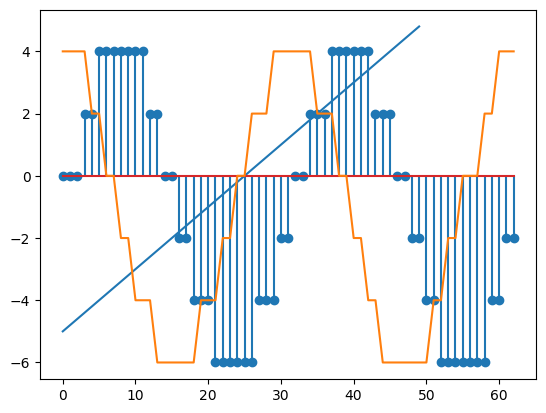

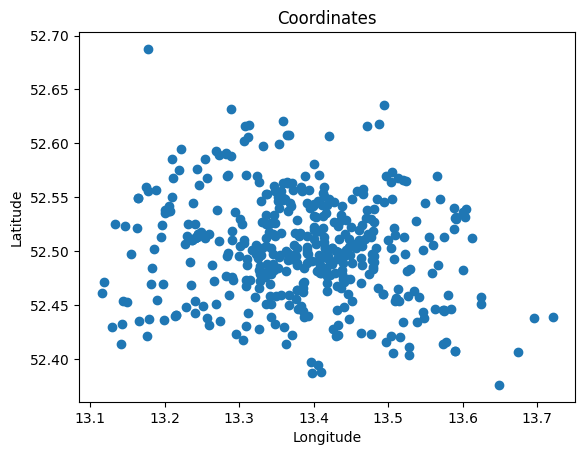

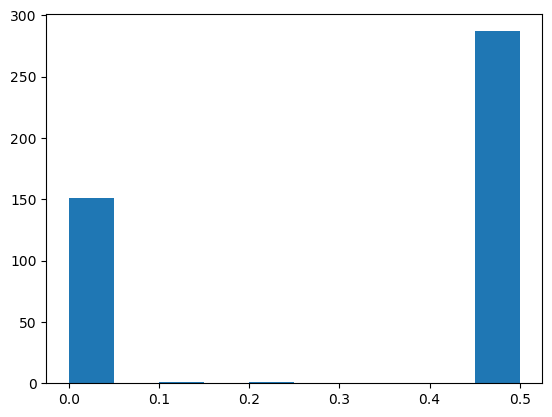

<Figure size 640x480 with 0 Axes>

In [6]:
# usage of numpy
array = np.arange(-5, 5, .2)
plt.plot(array)
array = np.arange(-2 * np.pi, 2 * np.pi, .2)
plt.stem(np.floor(np.sin(array) * 2.5) * 2)
array = np.arange(-2 * np.pi, 2 * np.pi, .2)
plt.plot(np.floor(np.cos(array) * 2.5) * 2)

plt.show()
plt.clf()

# usage with pandas
plt.scatter(x=df['Longitude'], y=df['Latitude'])

plt.title("Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()
plt.clf()

# histogram
plt.hist(df["Price"])

plt.show()
plt.clf()

9. Vytvořte na vhodném výběru dat z datového setu heatmapu, opět platí použijte komentáře, kde vysvětlíte, jak heatmapa pracuje a nezapomeňte použít popisky a titulek.

In [ ]:
import math

# https://stackoverflow.com/questions/1969240/mapping-a-range-of-values-to-another
# name of the function says it all
def map_range(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

xmin = min(df["Longitude"])
xmax = max(df["Longitude"])
ymin = min(df["Latitude"])
ymax = max(df["Latitude"])

fig, ax = plt.subplots()

SX = 20
SY = 20

# prepare data
array = np.zeros((SX + 1, SY + 1))
for i in df.index:
    x = math.floor(map_range(df["Longitude"][i], xmin, xmax, 0, SX))
    y = math.floor(map_range(df["Latitude"][i], ymin, ymax, 0, SY))
    if df["hasUrinal"][i]:
        continue
    array[x][y] += 1

for i, suba in enumerate(array):
    for j, e in enumerate(suba):
        text = ax.text(i, j, int(e),
                       ha="center", va="center", color="#fff", fontsize="5")

# heatmap
im = ax.imshow(array)

plt.title("Density of unrinal toillets")

plt.show()
plt.clf()

10. Vytvořte na vhodném výběru dat z datového setu lineární regresy, opět platí použijte komentáře, kde vysvětlíte výstup z lineární regrese.

In [ ]:
xmin = min(df["Longitude"])
xmax = max(df["Longitude"])
ymin = min(df["Latitude"])
ymax = max(df["Latitude"])

centerx = (xmax + xmin) / 2
centery = (ymax + ymin) / 2

fig, ax = plt.subplots()

# prepare data
# calculate distance from "center"
array = np.zeros(len(df))
for i, x, y in zip(df.index, df["Longitude"], df["Latitude"]):
    rx = centerx - x
    ry = centery - y
    array[i] = math.sqrt(rx**2 + ry**2)

array /= np.max(array)

# linear regression
b, a = np.polyfit(array, np.array(df["Price"]), deg=1)

line = np.linspace(0, np.max(df["Price"]), num=len(df))

plt.scatter(x=array, y=df["Price"])
plt.plot(line, a + b * line, color="black")

plt.title("Corelation price and distance")
plt.ylabel("Price")
plt.xlabel("Relative distance")

plt.show()
plt.clf()

# all of this for not very good display of relationship between price and distance